### Лаба 2.3
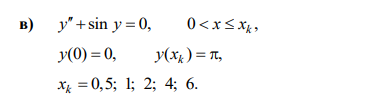

In [98]:
import numpy as np
import matplotlib.pyplot as plt

#### Рунге Кутте 3 порядка для решения задачи Коши

In [99]:
def RungeKutteOneIterate(t: float, yz: list, h: float,  y_func, z_func):
    k1y = h * y_func(t, yz)
    k1z = h * z_func(t, yz)
    k2y = h * y_func(t + h / 3, [yz[0] + k1y / 3, yz[1] + k1z / 3])
    k2z = h * z_func(t + h / 3, [yz[0] + k1y / 3, yz[1] + k1z / 3])
    k3y = h * y_func(t + 2 * h / 3, [yz[0] + 2 * k2y / 3, yz[1] + 2 * k2z / 3])
    k3z = h * z_func(t + 2 * h / 3, [yz[0] + 2 * k2y / 3, yz[1] + 2 * k2z / 3])
    t_n_1 = t + h
    y_n_1 = yz[0] + (k1y + 3 * k3y) / 4
    z_n_1 = yz[1] + (k1z + 3 * k3z) / 4
    return [t_n_1, [y_n_1, z_n_1]]

def RungeKutte(t0: float, yz0: list, h: float, N: int, y_func, z_func):
    SolveArray: list = list()
    SolveArray.append([t0, yz0])
    for i in range(N):
        t = SolveArray[-1][0]
        yz = SolveArray[-1][1] 
        t_n_1, yz_n_1 = RungeKutteOneIterate(t, yz, h, y_func, z_func)
        SolveArray.append([t_n_1, yz_n_1]) 
    return SolveArray

#### Преобразованное уравнение для метода стрельбы

In [100]:
def model(t, yz):
  y, z = yz
  dydt = z
  dzdt = -np.sin(y)
  return [dydt, dzdt]

# Краевое условие
y_xk = np.pi

# Значения x_k
x_k_values = [0.5, 1, 2, 4, 6]

# Точность
epsilon = 1e-6

# Шаг интегрирования
h = 0.01

#### Метод стрельбы

In [101]:
def strelba(t0, x_k, y0, s1, s2, y_xk, h, max_iter = 10000):
    for _ in range(max_iter):
        # Решение задачи Коши для s1
        N = int(x_k / h)
        u1 = RungeKutte(t0, [y0, s1], h, N, lambda t, yz: model(t, yz)[0], lambda t, yz: model(t, yz)[1])
        y1_xk = u1[-1][1][0]  # Извлекаем y(x_k)

        # Решение задачи Коши для s2
        u2 = RungeKutte(t0, [y0, s2], h, N, lambda t, yz: model(t, yz)[0], lambda t, yz: model(t, yz)[1])
        y2_xk = u2[-1][1][0]  # Извлекаем y(x_k)

        # Метод секущих для обновления s
        s_new = s2 - (y2_xk - y_xk) * (s2 - s1) / (y2_xk - y1_xk)

        # Проверка условия сходимости
        if abs(y2_xk - y_xk) < epsilon:
            break

        # Обновление s1 и s2
        s1 = s2
        s2 = s_new

    return u2, y2_xk

#### Метод Квазилианеризации с конечно разностной аппроксимацией

In [102]:
from scipy.linalg import solve_banded
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

def quasilinearization(x_k, y_xk, h, epsilon, max_iter = 100000):
    N = int(x_k / h)
    x = np.linspace(0, x_k, N + 1)

    # Начальное приближение
    y = np.linspace(0, y_xk, N+1)
    y[0] = 0
    y[-1] = y_xk

    # Итерации
    for _ in range(max_iter):
        # Матрица и вектор правой части для линейной системы
        A = np.zeros((N + 1, N + 1))
        b = np.zeros(N + 1)

        # Граничные условия
        A[0, 0] = 1
        b[0] = 0
        A[-1, -1] = 1
        b[-1] = y_xk

        # Заполнение матрицы A и вектора b
        for i in range(1, N):
            A[i, i - 1] = 1 / h**2
            A[i, i] = -2 / h**2 - np.cos(y[i])
            A[i, i + 1] = 1 / h**2
            b[i] = -np.sin(y[i]) + np.cos(y[i]) * y[i]

        # Решение линейной системы
        # y_new = np.linalg.solve(A, b)
        y_new = spsolve(csc_matrix(A), b)

        # Проверка сходимости
        if np.max(np.abs(y_new - y)) < epsilon:
            break

        # Обновление приближения
        y = y_new

    return x, y

Решение методом стрельбы
Решение для x_k = 0.5: y(0.5) = 3.1415926535919247


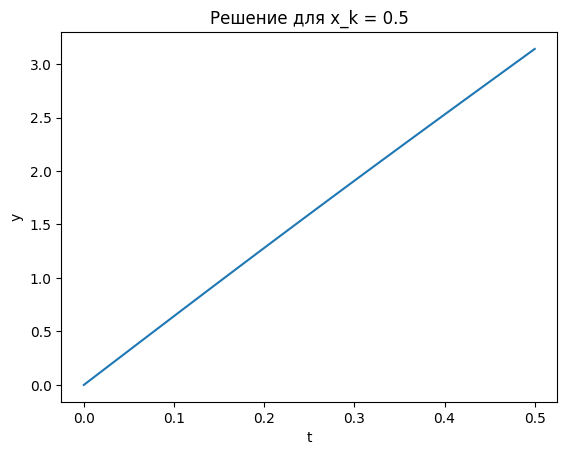

Решение для x_k = 1: y(1) = 3.1415926586020566


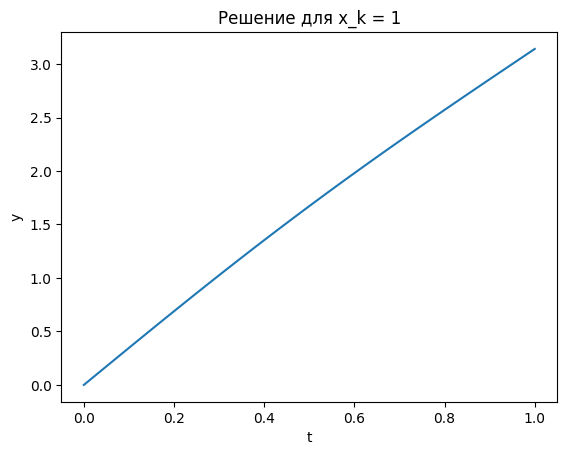

Решение для x_k = 2: y(2) = 3.1415926535865504


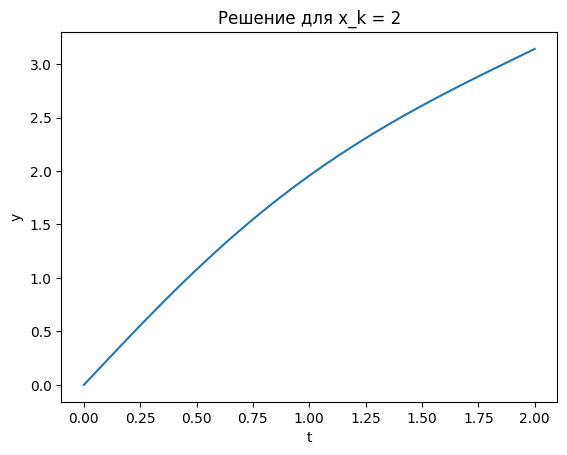

Решение для x_k = 4: y(4) = 3.1415926538978303


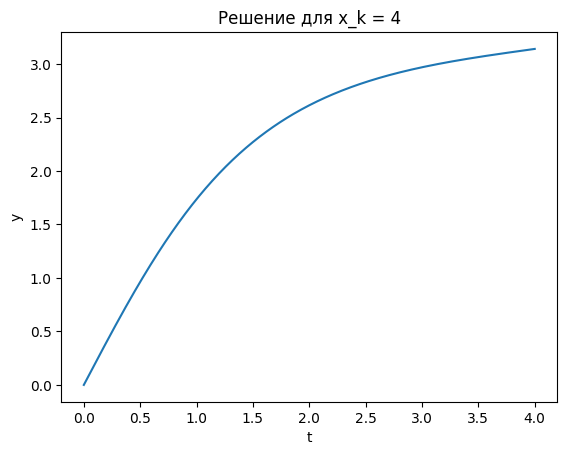

Решение для x_k = 6: y(6) = 3.1415926535899446


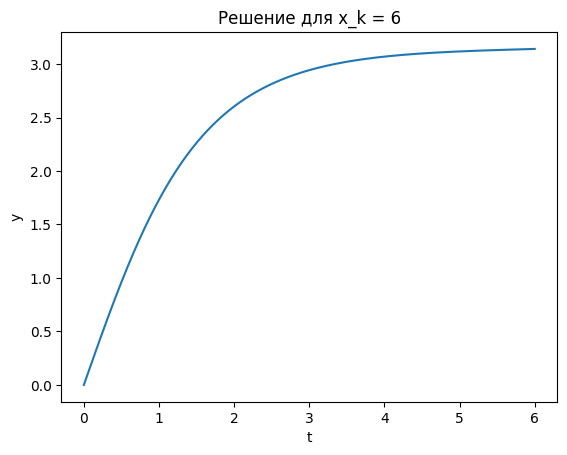

Решение методом квазилианеризации
Решение для x_k = 0.5: y(0.5) = 3.141592653589793


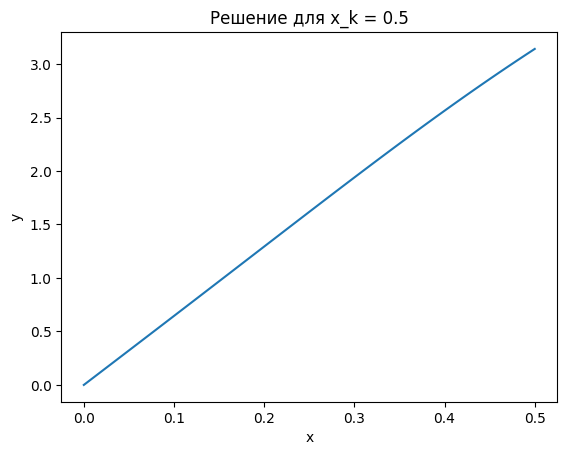

Решение для x_k = 1: y(1) = 3.141592653589793


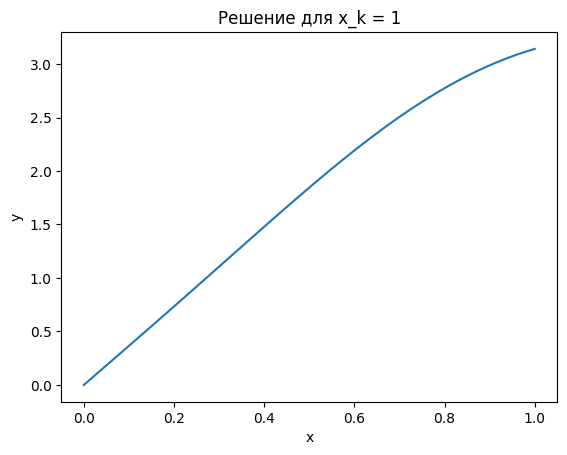

Решение для x_k = 2: y(2) = 3.141592653589793


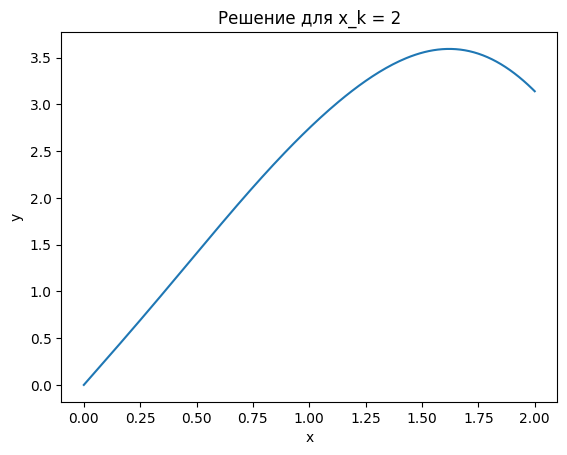

Решение для x_k = 4: y(4) = 3.141592653589793


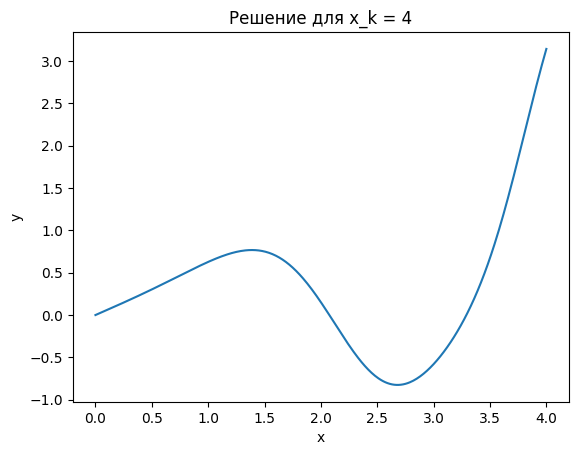

Решение для x_k = 6: y(6) = 3.141592653589793


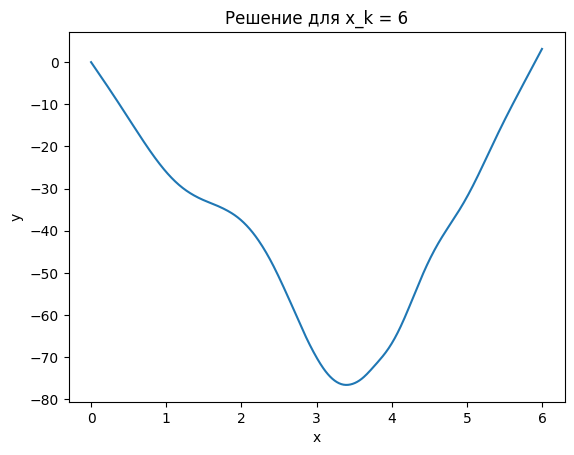

In [103]:
# Краевое условие
y_xk = np.pi

# Значения x_k
x_k_values = [0.5, 1, 2, 4, 6]

# Точность
epsilon = 1e-8

# Шаг интегрирования
h = 0.01

print("Решение методом стрельбы")
for x_k in x_k_values:
    # Начальные значения
    t0 = 0
    y0 = 0
    s1 = 1  # начальное приближение для s
    s2 = 2  # второе начальное приближение для s

    # Итерации метода стрельбы
    

    
    u2, y2_xk = strelba(t0, x_k, y0, s1, s2, y_xk, h)
    print(f"Решение для x_k = {x_k}: y({x_k}) = {y2_xk}")

    # Вывод результатов
    t_values = [u2[i][0] for i in range(len(u2))]
    y_values = [u2[i][1][0] for i in range(len(u2))]
    plt.plot(t_values, y_values)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.title(f"Решение для x_k = {x_k}")
    plt.show()


y_xk = np.pi

# Значения x_k
x_k_values = [0.5, 1, 2, 4, 6]

# Точность
epsilon = 1e-2

# Шаг интегрирования
h = 0.01

print("Решение методом квазилианеризации")
for x_k in x_k_values:
    x, y = quasilinearization(x_k, y_xk, h, epsilon)

    print(f"Решение для x_k = {x_k}: y({x_k}) = {y[-1]}")

    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Решение для x_k = {x_k}")
    plt.show()